# DESCRIPTIVE ANALYSIS

In [49]:
#import pandas library
import pandas as pd 
#run the CommonFunction notebook
%run CommonFunction.ipynb

In [50]:
#specify the path to csv file
csv_file_path = 'Ecommerce_Purchases.csv'
#read the csv file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

In [51]:
print(df.head())

                                             Address    Lot AM or PM  \
0  16629 Pace Camp Apt. 448\nAlexisborough, NE 77...  46 in       PM   
1  9374 Jasmine Spurs Suite 508\nSouth John, TN 8...  28 rn       PM   
2                   Unit 0065 Box 5052\nDPO AP 27450  94 vE       PM   
3              7780 Julia Fords\nNew Stacy, WA 45798  36 vm       PM   
4  23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...  20 IE       AM   

                                        Browser Info  \
0  Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...   
1  Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...   
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...   
4  Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...   

                           Company       Credit Card CC Exp Date  \
0                  Martinez-Herman  6011929061123406       02/20   
1  Fletcher, Richards and Whitaker  3337758169645356       11/18   
2       Simpson, Williams 

table_shape(df)
col(df)

In [53]:
#check for each column 
for each in df.columns:
    if each not in ['Job_list', 'Job_types']:
        check_duplicate(df,each)

The  Address does not have duplicates
The  Lot has duplicates
The  AM or PM has duplicates
The  Browser Info has duplicates
The  Company has duplicates
The  Credit Card does not have duplicates
The  CC Exp Date has duplicates
The  CC Security Code has duplicates
The  CC Provider has duplicates
The  Email has duplicates
The  Job has duplicates
The  IP Address does not have duplicates
The  Language has duplicates
The  Purchase Price has duplicates


In [54]:
multi_duplicate(df,'Address','Lot')

There are no duplicates in columns:  Address Lot


,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price


In [55]:
check_empty(df,'Address')

There is no empty cell in  Address column


,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price


In [56]:
multi_check_empty(df,'Address','Lot')

There is no empty cell in  Address column
There is no empty cell in  Lot column


In [57]:
#check for each column 
for each in df.columns:
    if each not in ['Job_list', 'Job_types']:
        check_empty(df,each)

There is no empty cell in  Address column
There is no empty cell in  Lot column
There is no empty cell in  AM or PM column
There is no empty cell in  Browser Info column
There is no empty cell in  Company column
There is no empty cell in  Credit Card column
There is no empty cell in  CC Exp Date column
There is no empty cell in  CC Security Code column
There is no empty cell in  CC Provider column
There is no empty cell in  Email column
There is no empty cell in  Job column
There is no empty cell in  IP Address column
There is no empty cell in  Language column
There is no empty cell in  Purchase Price column


In [58]:
#check for each column 
for each in df.columns:
    if each not in ['Job_list', 'Job_types']:
        count_unique(df, each, 20)

Can not categorized since it has so many types
Can not categorized since it has so many types
Can categorize into  ['PM' 'AM']
Can not categorized since it has so many types
Can not categorized since it has so many types
Can not categorized since it has so many types
Can not categorized since it has so many types
Can not categorized since it has so many types
Can categorize into  ['JCB 16 digit' 'Mastercard' 'Discover' 'Diners Club / Carte Blanche'
 'VISA 16 digit' 'VISA 13 digit' 'American Express' 'Voyager'
 'JCB 15 digit' 'Maestro']
Can not categorized since it has so many types
Can not categorized since it has so many types
Can not categorized since it has so many types
Can categorize into  ['el' 'fr' 'de' 'es' 'ru' 'pt' 'zh' 'en' 'it']
Can not categorized since it has so many types


# CLASSIFY JOBS INTO TOP 5 CAREERS

In [59]:
import re

In [60]:
job_counts = df['Job'].value_counts()

print(job_counts)

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
                                 ..
Prison officer                    7
Editor, film/video                6
Actuary                           6
Information systems manager       5
Investment analyst                5
Name: Job, Length: 623, dtype: int64


In [61]:
#combine each word in job to become job_list, add as a new column to the DF
df['Job'] = df['Job'].str.lower()
df['Job_list'] = df['Job'].apply(lambda x: re.split(r'\s+|, |\/|, ', x))

print(df['Job_list'].head())

0    [scientist, product, process, development]
1                          [drilling, engineer]
2                  [customer, service, manager]
3                          [drilling, engineer]
4                                [fine, artist]
Name: Job_list, dtype: object


In [62]:
#define the function to check if the job_list column has any element in job_type 
def check_job_type(job_list):
    check_list = ['designer', 'lawyer', 'researcher','manager','assistant','worker','engineer','officer',
            'scientist','analyst','teacher','nurse','secretary', 
            'sales','producer','sports','artist'
           ]
    job_type = 'Others'
    for job in job_list:
        if job in check_list:
            job_type = job
            break
    return job_type

#check if the Job_list_string column match the top_5_list
df['Job_types'] = df['Job_list'].apply(check_job_type)

print(df[['Job','Job_list','Job_types']].head())

job_type_counts = df['Job_types'].value_counts()

print(job_type_counts)

                                      Job  \
0  scientist, product/process development   
1                       drilling engineer   
2                customer service manager   
3                       drilling engineer   
4                             fine artist   

                                     Job_list  Job_types  
0  [scientist, product, process, development]  scientist  
1                        [drilling, engineer]   engineer  
2                [customer, service, manager]    manager  
3                        [drilling, engineer]   engineer  
4                              [fine, artist]     artist  
Others        5324
engineer       936
manager        785
officer        770
designer       475
scientist      406
teacher        252
worker         191
assistant      133
nurse          128
sports         106
sales          100
secretary       97
researcher      93
producer        73
analyst         61
artist          40
lawyer          30
Name: Job_types, dtype: int64


In [63]:
column_names = df.columns
print(column_names)

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price', 'Job_list', 'Job_types'],
      dtype='object')


# Top jobs and total purchase amount relationship

In [64]:
#questions 1 and questions 2

#Find the relationship between top 5 Job designation and total Purchase amount, mean Purchase amount
#group by Job_types

grouped_df = df.groupby('Job_types')['Purchase Price'].agg({'count','sum','mean'})
sorted_grouped_df = grouped_df.sort_values('mean', ascending=False)

print(sorted_grouped_df)

                  sum  count       mean
Job_types                              
lawyer        1603.85     30  53.461667
producer      3833.82     73  52.518082
analyst       3181.46     61  52.155082
nurse         6612.45    128  51.659766
scientist    20583.55    406  50.698399
Others      269688.63   5324  50.655265
officer      38921.81    770  50.547805
designer     23706.63    475  49.908695
sports        5288.05    106  49.887264
assistant     6634.13    133  49.880677
engineer     46612.11    936  49.799263
manager      39054.22    785  49.750599
researcher    4592.95     93  49.386559
teacher      12420.32    252  49.286984
secretary     4741.36     97  48.880000
artist        1937.44     40  48.436000
sales         4840.45    100  48.404500
worker        9219.79    191  48.271152


In [65]:
import matplotlib.pyplot as plt
import numpy as np

In [66]:
#remove Other type in Job type
#create a new DF , groupby Job_types, purchase price

job_plot = df[df['Job_types'] != 'Others']
job_plot = job_plot.groupby('Job_types')['Purchase Price'].agg({'sum','count','mean'})
print(job_plot)

                 sum  count       mean
Job_types                             
analyst      3181.46     61  52.155082
artist       1937.44     40  48.436000
assistant    6634.13    133  49.880677
designer    23706.63    475  49.908695
engineer    46612.11    936  49.799263
lawyer       1603.85     30  53.461667
manager     39054.22    785  49.750599
nurse        6612.45    128  51.659766
officer     38921.81    770  50.547805
producer     3833.82     73  52.518082
researcher   4592.95     93  49.386559
sales        4840.45    100  48.404500
scientist   20583.55    406  50.698399
secretary    4741.36     97  48.880000
sports       5288.05    106  49.887264
teacher     12420.32    252  49.286984
worker       9219.79    191  48.271152


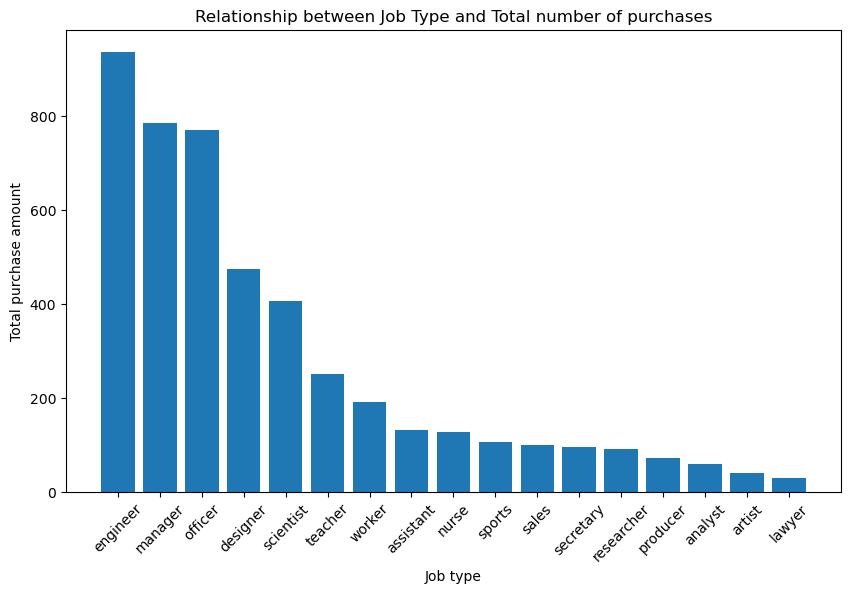

In [86]:
job_plot = job_plot.sort_values(by='count',ascending=False)
categories = job_plot.index
values = job_plot['count']
bar_plot(categories,values,figsize=(10,6),xlabel='Job type',ylabel='Total purchase amount',
         title='Relationship between Job Type and Total number of purchases',rotation=45)

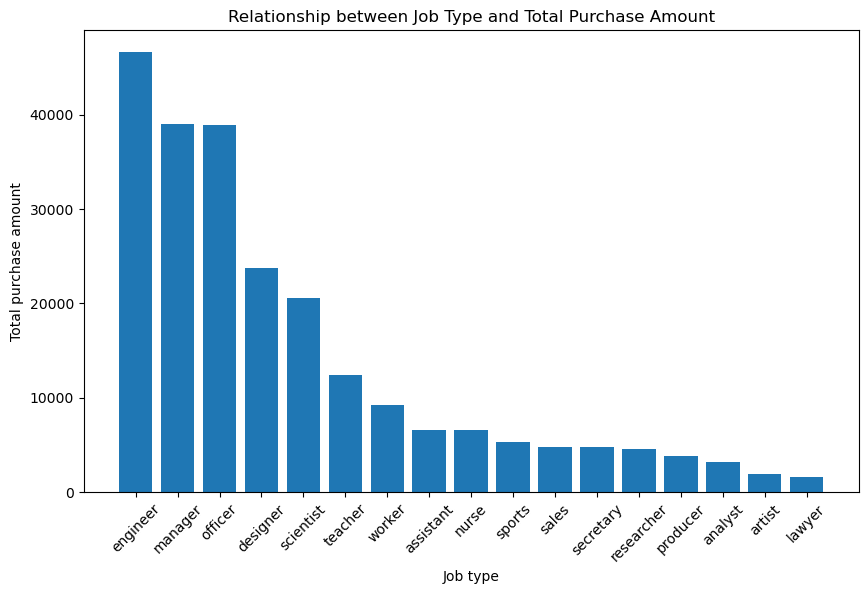

In [68]:
job_plot = job_plot.sort_values(by='sum',ascending=False)
categories = job_plot.index
values = job_plot['sum']
bar_plot(categories,values,figsize=(10,6),xlabel='Job type',ylabel='Total purchase amount',
         title='Relationship between Job Type and Total Purchase Amount',rotation=45)

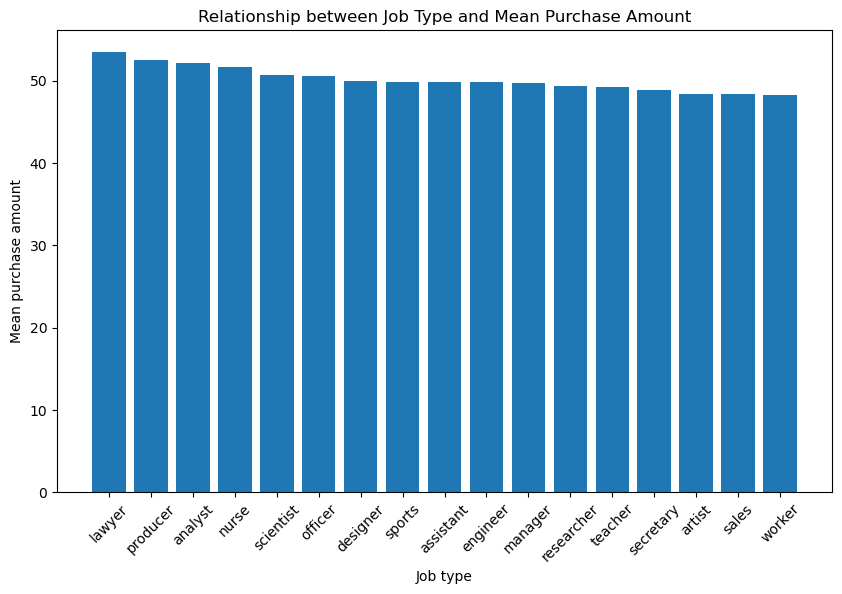

In [85]:
job_plot = job_plot.sort_values(by='mean',ascending=False)
categories = job_plot.index
values = job_plot['mean']
bar_plot(categories,values,xlabel='Job type',ylabel='Mean purchase amount',
         title='Relationship between Job Type and Mean Purchase Amount',rotation=45)

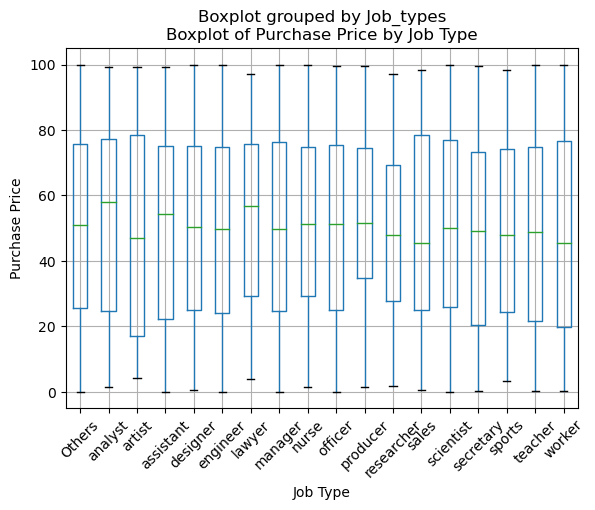

In [89]:
box_plot_by_group(df,column='Purchase Price',by='Job_types',
                  xlabel='Job Type',ylabel='Purchase Price',
                  title='Boxplot of Purchase Price by Job Type',rotation=45)

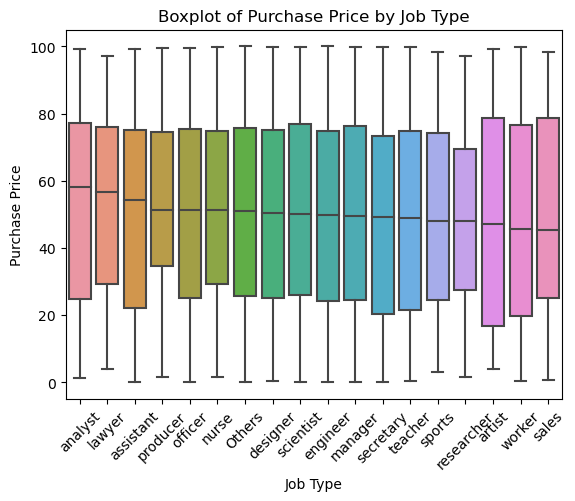

In [92]:
import seaborn as sns
import pandas as pd

# Calculate mean values for each group
mean_values = df.groupby('Job_types')['Purchase Price'].median()

# Sort groups by mean values
sorted_groups = mean_values.sort_values(ascending=False).index

# Create the box plot using the sorted order
sns.boxplot(data=df, x='Job_types', y='Purchase Price', order=sorted_groups)

# Set the axis labels and title
plt.xlabel('Job Type')
plt.ylabel('Purchase Price')
plt.title('Boxplot of Purchase Price by Job Type')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Change the Browser Info to Browser category

In [72]:
#How does purchase value depend on the Internet Browser used and Job (Profession) of the purchaser?
#need to classify the browser
print(df.loc[1,'Browser Info'])

Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Presto/2.9.176 Version/11.00


In [73]:
#find the position of the first / , extract the substring from the start 
def browser(cell):
    slash_index = cell.find('/')
    browser = cell[:slash_index]
    return browser

df['Browser'] = df['Browser Info'].apply(browser)

In [74]:
count_unique(df,'Browser',20)

Can categorize into  ['Opera' 'Mozilla']


2

In [75]:
#classify the browser information 
browser_df = df.groupby('Browser')['Purchase Price'].agg({'sum','count','mean'})
print(browser_df)

               sum  count       mean
Browser                             
Mozilla  397741.56   7924  50.194543
Opera    105731.46   2076  50.930376


In [94]:
#classify the browser information and job_type_5
browser_job_df = df.groupby(['Browser','Job_types'])['Purchase Price'].agg({'sum','count','mean'})
sorted_browser_job_df = browser_job_df.sort_values(by=['Browser','count'], ascending=[True,False])
print(sorted_browser_job_df)

                          sum  count       mean
Browser Job_types                              
Mozilla Others      210901.85   4188  50.358608
        engineer     37106.48    747  49.674003
        manager      31756.42    634  50.088991
        officer      31244.52    623  50.151717
        designer     18525.56    373  49.666381
        scientist    15755.24    316  49.858354
        teacher      10323.26    206  50.112913
        worker        7016.65    144  48.726736
        assistant     5333.23    108  49.381759
        nurse         5529.50    108  51.199074
        sports        4315.53     83  51.994337
        sales         3756.32     79  47.548354
        secretary     3731.17     74  50.421216
        researcher    3809.27     73  52.181781
        producer      3212.90     62  51.820968
        analyst       2669.41     51  52.341373
        artist        1681.28     34  49.449412
        lawyer        1072.97     21  51.093810
Opera   Others       58786.78   1136  51

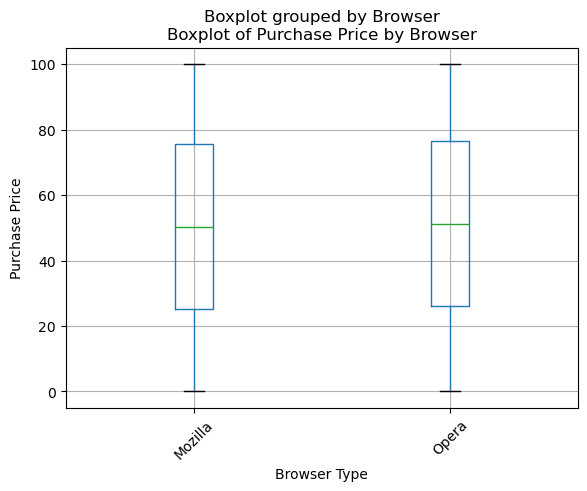

In [77]:
box_plot_by_group(df,column='Purchase Price',by='Browser',
                  xlabel='Browser Type',ylabel='Purchase Price',
                  title='Boxplot of Purchase Price by Browser',rotation=45)

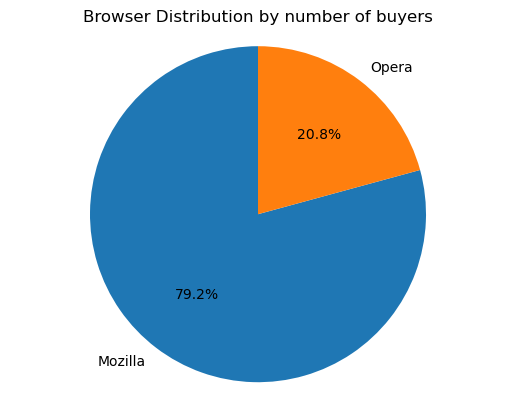

In [78]:
pie_chart(browser_df['count'], labels=browser_df.index,title='Browser Distribution by number of buyers')

# Time and Location

In [95]:
#What are the patterns, if any, 
#on the purchases based on Location (State) and time of purchase (AM or PM)?
#What are top 5 Location(State) for purchases?

time_df = df.groupby(['AM or PM'])['Purchase Price'].agg({'sum','count','mean'})
print(time_df)

                sum  count       mean
AM or PM                             
AM        247519.87   4932  50.186511
PM        255953.15   5068  50.503779


In [80]:
df['State'] = df['Address'].apply(lambda x: x.split(' ')[-2])
print(df['State'].nunique())

62


In [81]:
#top 5 location for purchase based on count
location_df = df.groupby(['State'])['Purchase Price'].agg({'sum','count','mean'})
sorted_location_df = location_df.sort_values('count', ascending=False)
print(sorted_location_df)

            sum  count       mean
State                            
AP     19563.98    376  52.031862
AA     18096.87    351  51.558034
AE     16387.21    331  49.508187
IN      9415.40    183  51.450273
VI      8304.62    178  46.655169
...         ...    ...        ...
CO      6413.53    133  48.222030
SC      6079.62    131  46.409313
VT      6881.91    131  52.533664
NM      6812.17    130  52.401308
TN      6287.53    127  49.508110

[62 rows x 3 columns]


In [96]:
#top 5 location for purchase based on mean
sorted_mean_location_df = location_df.sort_values('mean', ascending=False)
print(sorted_mean_location_df)

           sum  count       mean
State                           
FM     8230.48    149  55.238121
OR     7484.63    136  55.034044
GA     8699.23    159  54.712138
MA     9394.40    172  54.618605
WI     8509.18    160  53.182375
...        ...    ...        ...
VI     8304.62    178  46.655169
SC     6079.62    131  46.409313
GU     6987.65    151  46.275828
PW     7780.19    170  45.765824
MI     7255.01    160  45.343812

[62 rows x 3 columns]


# CC provider

In [82]:
ccprovider_df =df.groupby('CC Provider')['Purchase Price'].agg({'count','sum','mean'})
sorted_ccprovider_df = ccprovider_df.sort_values('sum',ascending=False)
print(sorted_ccprovider_df)

                                  sum  count       mean
CC Provider                                            
VISA 16 digit                85528.86   1715  49.871055
JCB 16 digit                 84597.33   1716  49.299143
JCB 15 digit                 44376.60    868  51.125115
Voyager                      43085.77    829  51.973185
American Express             42865.52    849  50.489423
Maestro                      42620.78    846  50.379173
Discover                     42208.13    817  51.662338
Mastercard                   40835.10    816  50.043015
VISA 13 digit                39976.54    777  51.449858
Diners Club / Carte Blanche  37378.39    767  48.733233


In [83]:
ccprovider_time_df =df.groupby(['CC Provider','AM or PM'])['Purchase Price'].agg({'count','sum','mean'})
sorted_ccprovider_time_df = ccprovider_time_df.sort_values(by=['CC Provider','AM or PM'],ascending=False)
print(sorted_ccprovider_time_df)

                                           sum  count       mean
CC Provider                 AM or PM                            
Voyager                     PM        20211.08    401  50.401696
                            AM        22874.69    428  53.445537
VISA 16 digit               PM        43575.12    865  50.375861
                            AM        41953.74    850  49.357341
VISA 13 digit               PM        19990.01    382  52.329869
                            AM        19986.53    395  50.598810
Mastercard                  PM        21589.71    438  49.291575
                            AM        19245.39    378  50.913730
Maestro                     PM        23064.80    454  50.803524
                            AM        19555.98    392  49.887704
JCB 16 digit                PM        42093.82    845  49.815172
                            AM        42503.51    871  48.798519
JCB 15 digit                PM        23169.48    449  51.602405
                         

In [105]:
#group data by 'CC Provider' , 'AM or PM' , calcualte the count of purchases 
grouped = df.groupby(['CC Provider', 'AM or PM']).size().reset_index(name='Count')

#pivot the table to have 'AM' and 'PM' as cols
pivoted = grouped.pivot(index='CC Provider', columns='AM or PM', values = 'Count')

# Calculate the difference between AM and PM purchases
pivoted['Difference'] = pivoted['AM'] - pivoted['PM']

print(pivoted.sort_values(by='Difference'))


AM or PM                      AM   PM  Difference
CC Provider                                      
Maestro                      392  454         -62
Mastercard                   378  438         -60
Discover                     389  428         -39
JCB 15 digit                 419  449         -30
VISA 16 digit                850  865         -15
Diners Club / Carte Blanche  382  385          -3
American Express             428  421           7
VISA 13 digit                395  382          13
JCB 16 digit                 871  845          26
Voyager                      428  401          27


Text(0.5, 1.0, 'Count Heatmap')

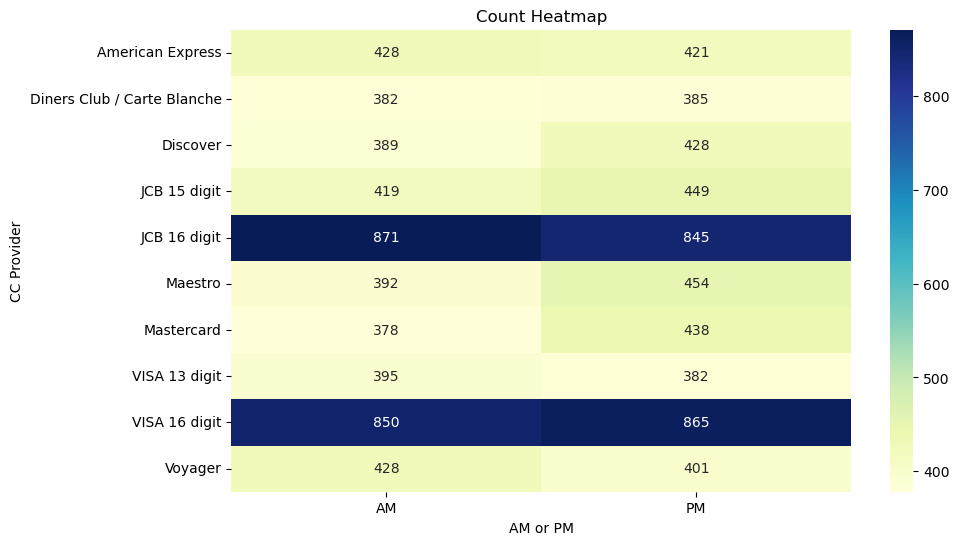

In [84]:
#draw a heatmap
import seaborn as sns

#reshape the DF to have CCprovider as rows, AM or PM as columns and count as values
count_heatmap_df = sorted_ccprovider_time_df.pivot_table(index='CC Provider',columns='AM or PM', values='count')

#create the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(count_heatmap_df,annot=True,fmt='d',cmap='YlGnBu')

plt.title('Count Heatmap')